In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [7]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
# experiment_sub_dir = "2025Jul09-171538_configs" # good latest run

experiment_sub_dir = "2025Jul12-011043_configs" 

exp_path = os.path.join(os.path.abspath("."), "results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_experiment_path', 'seed', 'experiment_name'],
      dtype='object')

In [8]:
df

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_experiment_path,seed,experiment_name
0,training,200000,0.983159,-20.664096,-2.431534,-8.556072,-8.316907,2.455555,-17.224067,-2.333898,...,1.552088,1.699233,0.536293,48749.0,76.0,0 days 00:11:03.024389,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
1,training,400000,0.965886,-21.830823,-2.810354,-8.635389,-8.416434,2.437477,-17.672885,-2.678621,...,1.107309,1.329857,0.680844,50000.0,80.0,0 days 00:11:24.437769,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
2,training,600000,0.948614,-21.921767,-2.240857,-8.237756,-7.943435,2.346722,-18.231656,-2.139539,...,0.210932,0.477518,0.867941,50000.0,80.0,0 days 00:11:40.022829,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
3,training,800000,0.931341,-18.244563,-2.078949,-7.953201,-7.714770,2.284169,-15.367796,-1.995580,...,-0.704824,-0.396617,0.997429,50000.0,80.0,0 days 00:11:45.254951,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
4,training,1000000,0.914068,-18.579114,-2.485597,-7.466986,-7.214121,2.093121,-15.999602,-2.379857,...,-0.958133,-0.580502,1.179979,50000.0,80.0,0 days 00:11:44.629789,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,validation,11200000,NaN,-6.555670,-6.498881,-6.500175,-6.498998,0.008095,-6.234372,-6.184903,...,-1.774744,-1.153543,1.927148,NaN,NaN,0 days 00:00:01.904823,5000,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.target_model_update_fr...
956,validation,11400000,NaN,-6.510366,-6.510180,-6.510276,-6.510276,0.000039,-6.195305,-6.195132,...,-1.768183,-1.130567,1.933701,NaN,NaN,0 days 00:00:01.955613,5000,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.target_model_update_fr...
957,validation,11600000,NaN,-7.308684,-6.625805,-6.642150,-6.625890,0.104095,-6.889300,-6.299669,...,-1.488507,-0.684244,1.960776,NaN,NaN,0 days 00:00:01.895899,5000,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.target_model_update_fr...
958,validation,11800000,NaN,-6.906419,-6.513647,-6.521940,-6.513768,0.056082,-6.547542,-6.198827,...,-1.761203,-1.142977,1.920906,NaN,NaN,0 days 00:00:01.893368,5000,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.target_model_update_fr...


In [9]:
# df[df['epoch_type'] == 'validation']
df[df['epoch_type'] == 'training']


,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_experiment_path,seed,experiment_name
0,training,200000,0.983159,-20.664096,-2.431534,-8.556072,-8.316907,2.455555,-17.224067,-2.333898,...,1.552088,1.699233,0.536293,48749.0,76.0,0 days 00:11:03.024389,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
1,training,400000,0.965886,-21.830823,-2.810354,-8.635389,-8.416434,2.437477,-17.672885,-2.678621,...,1.107309,1.329857,0.680844,50000.0,80.0,0 days 00:11:24.437769,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
2,training,600000,0.948614,-21.921767,-2.240857,-8.237756,-7.943435,2.346722,-18.231656,-2.139539,...,0.210932,0.477518,0.867941,50000.0,80.0,0 days 00:11:40.022829,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
3,training,800000,0.931341,-18.244563,-2.078949,-7.953201,-7.714770,2.284169,-15.367796,-1.995580,...,-0.704824,-0.396617,0.997429,50000.0,80.0,0 days 00:11:45.254951,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
4,training,1000000,0.914068,-18.579114,-2.485597,-7.466986,-7.214121,2.093121,-15.999602,-2.379857,...,-0.958133,-0.580502,1.179979,50000.0,80.0,0 days 00:11:44.629789,2500,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,training,11200000,0.050000,-6.522853,-1.329230,-3.621858,-3.592042,0.668124,-6.178602,-1.306737,...,-0.955872,-0.646400,1.164804,50000.0,40.0,0 days 00:11:43.833715,5000,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.target_model_update_fr...
896,training,11400000,0.050000,-6.255585,-1.106633,-3.629371,-3.605354,0.666000,-5.924210,-1.093152,...,-0.946177,-0.626704,1.169893,50000.0,40.0,0 days 00:11:44.281473,5000,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.target_model_update_fr...
897,training,11600000,0.050000,-6.995179,-1.227299,-3.636114,-3.612685,0.657965,-6.589217,-1.210541,...,-0.947627,-0.624526,1.178108,50000.0,40.0,0 days 00:11:43.396556,5000,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.target_model_update_fr...
898,training,11800000,0.050000,-6.663026,-1.308774,-3.636595,-3.616406,0.669903,-6.313703,-1.289115,...,-0.927998,-0.604789,1.170613,50000.0,40.0,0 days 00:11:44.954842,5000,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_agent_params.args_.target_model_update_fr...


In [10]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_agent_params.args_.target_model_update_freq    5000
Name: 1, dtype: object
Best mean reward: -6.150176153800723


In [11]:
averaged_results

,sub_exp_cfg_agent_params.args_.target_model_update_freq,episode_rewards_mean,sub_experiment_path
0,2500,-17.154346,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,5000,-6.150176,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [12]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

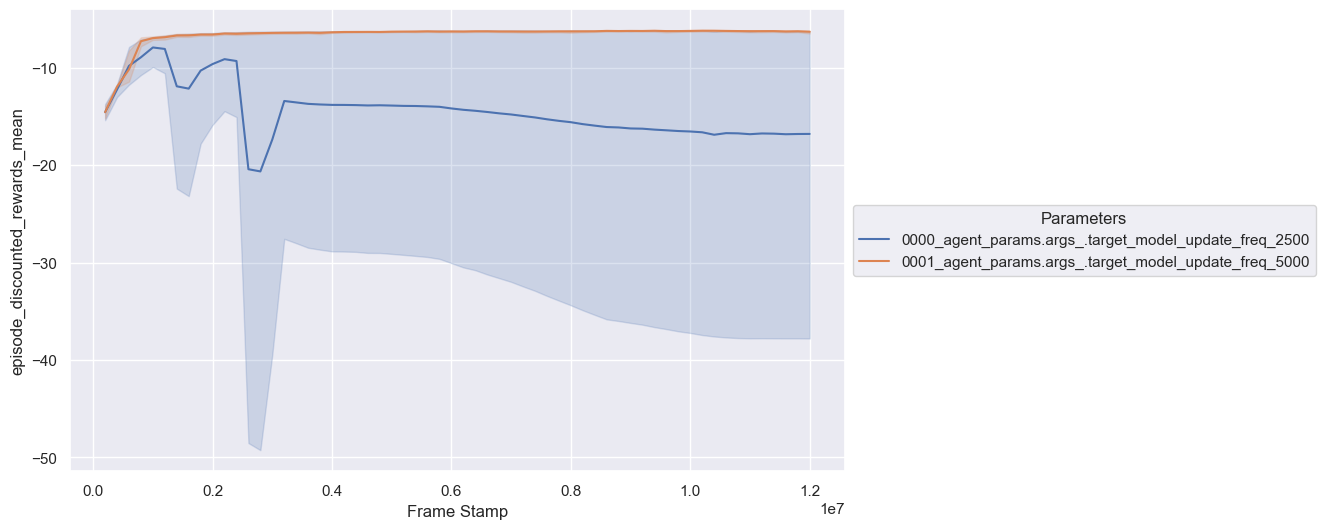

In [13]:

selected_metric = 'episode_discounted_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

validation_df = df[df['epoch_type'] == 'validation']
# validation_df = df[df['epoch_type'] == 'training']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=validation_df, 
             x='frame_stamp', 
             y=selected_metric, 
             hue=hue_col,
            #  units='seed', # Comment this to see mean + cf
            #  estimator=None, # Comment this to see mean + cf
             )

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [14]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_experiment_path', 'seed', 'experiment_name'],
      dtype='object')

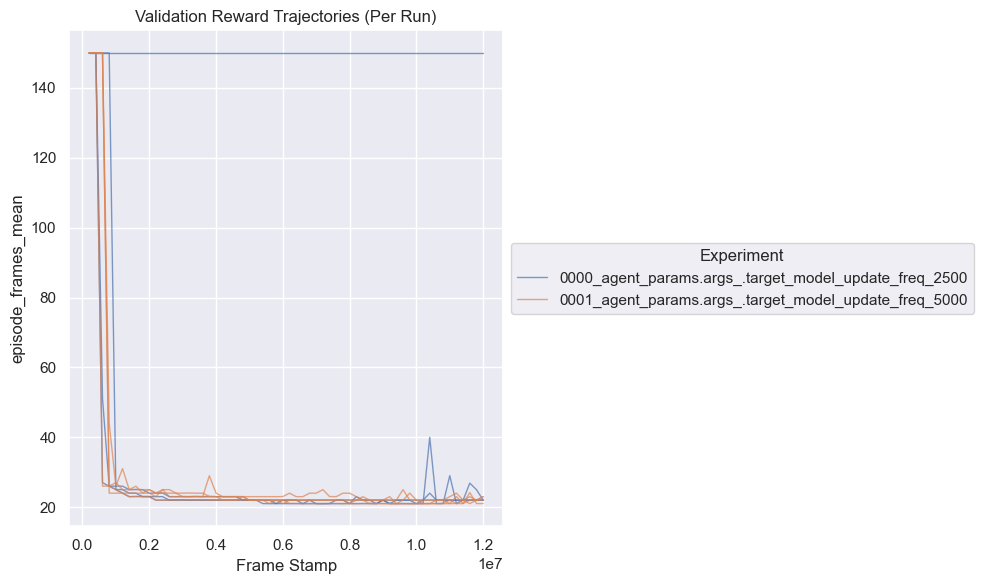

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = 'episode_frames_mean'
hue_col = "experiment_name"  # or another distinguishing column like "sub_experiment_path"

validation_df = df[df['epoch_type'] == 'validation']

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x='frame_stamp',
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units='sub_experiment_path',  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.title('Validation Reward Trajectories (Per Run)')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Experiment')
plt.tight_layout()
plt.show()


In [16]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_agent_params.args_.target_model_update_freq
119,validation,12000000,-6.715050,22.000000,-6.373209,NaN,NaN,0 days 00:00:01.315616,0,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2500
239,validation,12000000,-6.677406,22.000000,-6.341261,NaN,NaN,0 days 00:00:01.888606,1,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2500
359,validation,12000000,-85.491438,150.000000,-48.279104,NaN,NaN,0 days 00:00:01.639084,2,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2500
479,validation,12000000,-6.546188,22.000000,-6.220448,NaN,NaN,0 days 00:00:01.434387,3,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2500
599,validation,12000000,-6.941852,23.000000,-6.581253,NaN,NaN,0 days 00:00:01.844555,0,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000
719,validation,12000000,-6.570794,23.000000,-6.245140,NaN,NaN,0 days 00:00:01.756437,1,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000
839,validation,12000000,-6.580892,22.000000,-6.251941,NaN,NaN,0 days 00:00:01.346881,2,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000
959,validation,12000000,-6.506039,21.020833,-6.191644,NaN,NaN,0 days 00:00:01.460545,3,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000


In [17]:
agg_cols = [col for col in sub_df.columns if "sub_exp_cfg" in col]
aggregated_df = (
    sub_df.groupby(agg_cols)
    .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
    .reset_index()
)
aggregated_df

,sub_exp_cfg_agent_params.args_.target_model_update_freq,episode_discounted_rewards_mean
0,2500,-16.803506
1,5000,-6.317495


In [18]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq'],
      dtype='object')

In [19]:
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])



d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Jul12-011043_configs\0001_agent_params.args_.target_model_update_freq_5000\3


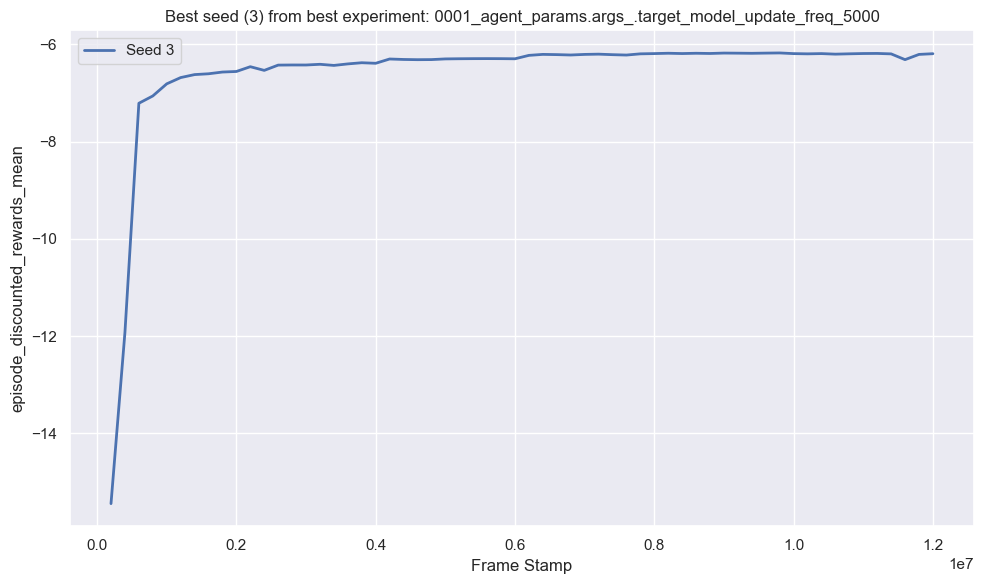

In [20]:
selected_metric = 'episode_discounted_rewards_mean'
hue_col = "experiment_name"

# Filter for training data only
# training_df = df[df['epoch_type'] == 'training']
training_df = df[df['epoch_type'] == 'validation']

# Step 1: Find best experiment
experiment_means = training_df.groupby(hue_col)[selected_metric].mean()
best_experiment = experiment_means.idxmax()

# Step 2: Filter to that experiment
best_exp_df = training_df[training_df[hue_col] == best_experiment]

# Step 3: Find best seed within best experiment
best_seed = (
    best_exp_df.groupby('seed')[selected_metric]
    .mean()
    .idxmax()
)

# Step 4: Filter to best seed
best_seed_df = best_exp_df[best_exp_df['seed'] == best_seed]

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_seed_df,
    x='frame_stamp',
    y=selected_metric,
    lw=2,
    label=f"Seed {best_seed}"
)

plt.title(f"Best seed ({best_seed}) from best experiment: {best_experiment}")
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.legend()
plt.tight_layout()
plt.show()

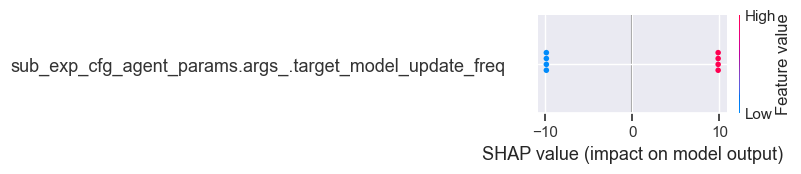

In [21]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [22]:
hyperparam_columns

['sub_exp_cfg_agent_params.args_.target_model_update_freq']

In [23]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()


IndexError: list index out of range